# $$\text{ TME 01: Problèmes de Bandits } $$

## Imports

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import *
import math
sns.set_style('whitegrid')
%matplotlib inline

## Traitement des données

In [2]:
# Comme chaque ligne contient id:context:reward, la classe data permet de bien gérer et stocker les données
class Data:
    def __init__(self, FILENAME):
        self.reward=[] # Contient tous les tableaux de gains
        self.context=[] # contient les tableau de context
        with open(FILENAME) as f:
            for line in f.readlines():
                parts = line.split(':')
                parts[1] = parts[1].split(';')
                parts[2] = parts[2].split(';')
                self.context.append(np.array([float(i) for i in parts[1]]))
                self.reward.append(np.array([float(i) for i in parts[2]]))
        self.reward=np.array(self.reward)
        self.context=np.array(self.context)
    
    def __iter__(self):
        # à chaque fois on traite un tuple context,reward
        for i in range(len(self.reward)):
            yield self.context[i], self.reward[i]
    
        
                

In [3]:
# test de la classe
data = Data('CTR.txt')
# list(data) permet de retourner toutes les tuples context,reward
print(np.array(list(data)).shape)

(5000, 2)


# Implémentation des stratégies

## Baselines

### • Stratégie Random <br>
A chaque itération, on choisit n'importe quel annonceur

In [4]:
# la classe permet de jouer aléatoirement à chaque fois
class RandomStrategy(): 
    def __init__(self):
        pass
    def step(self,context,reward):
        # permet de jouer un coup, retourne l'index du annonceur choisit
        rand_idx = np.random.randint(low = 0, high = len(reward))
        return rand_idx

In [5]:
# Test de la classe
random = RandomStrategy()
print(random.step(1,[1,1,1,1,1]))

2


### • StaticBest <br> 
A chaque itération, on choisit l'annonceur avec le meilleur taux de clics cumulés

In [6]:
# la classe permet de jouer en suivant la stratégie StaticBest à chaque fois
class StaticBestStrategy():
    def __init__(self, data):
        mu = np.array(list(data))[:,1] # contient la moyenne de gain général pour chaque annonceur
        self.best = np.argmax(np.sum(mu, axis = 0)) # l'index de l'annonceur qui a la meilleure moyenne géneral
    def step(self,context,reward):
        # permet de jouer un coup, retourne l'index du annonceur choisit
        return self.best
        
        
        
        

In [7]:
# Test de la classe
staticbest = StaticBestStrategy(data)
print(staticbest.step(1,1))

3


### • Stratégie Optimale <br>
A chaque iteration, on choisit l'annonceur qui a le meilleur taux de clics à cette itération

In [8]:
# la classe permet de jouer en suivant la stratégie StaticBest à chaque fois
class OptimaleStrategy :
    def __init__(self):
        pass
    
    def step(self,context,reward):  
        # permet de jouer un coup, retourne l'index du annonceur choisit
        return np.argmax(np.array(reward))

In [9]:
# Test de la classe
opt = OptimaleStrategy()
opt.step(1,[1,5,6,4,9,6,4])

4

## Visualisations & Expériences (sur les stratégies Baseline)

#### * Calculons le gain cumulé et le regret cumulé 

In [10]:
gain_random=[] # contient le gain de la stratégie random à chaque fois
gain_staticbest=[] # contient le gain de la stratégie staticBest à chaque fois
gain_optimal=[] # contient le gain de la stratégie optimal à chaque fois

regret_random=[] # contient le regret de la stratégie random à chaque fois
regret_staticbest=[] # contient le regret de la stratégie staticBest à chaque fois
regret_optimal=[] # contient le regret de la stratégie optimal à chaque fois

random = RandomStrategy() # instantiation  d'un annonceur aléatoire
staticBest = StaticBestStrategy(data) # instation d'un annonceur staticBest
optimal = OptimaleStrategy() # instantiation d'un annonceur optimal

# pour chaque tuple de notre base de données
for (context,reward) in data:
    # calcule des actions choisient par chaque stratégie
    action_random = random.step(context,reward)
    action_staticBest = staticBest.step(context,reward)
    action_optimal = optimal.step(context,reward) 
    
    # récuperation des gains pour chaque stratégie
    gain_random.append(reward[action_random])
    gain_staticbest.append(reward[action_staticBest])
    gain_optimal.append(reward[action_optimal])
    
    m= max(reward)
    # récuperation des regret pour chaque stratégie
    regret_random.append(m-reward[action_random])
    regret_staticbest.append(m-reward[action_staticBest])
    regret_optimal.append(m-reward[action_optimal])
# Calcule du gain cumulé pour chauque stratégie   
gain_random_cum = np.array(gain_random).cumsum()
gain_staticbest_cum = np.array(gain_staticbest).cumsum()
gain_optimal_cum = np.array(gain_optimal).cumsum()

# Calcule de regret pour chaque stratégie
regret_random_cum = np.array(regret_random).cumsum()
regret_staticbest_cum = np.array(regret_staticbest).cumsum()
regret_optimal_cum = np.array(regret_optimal).cumsum()

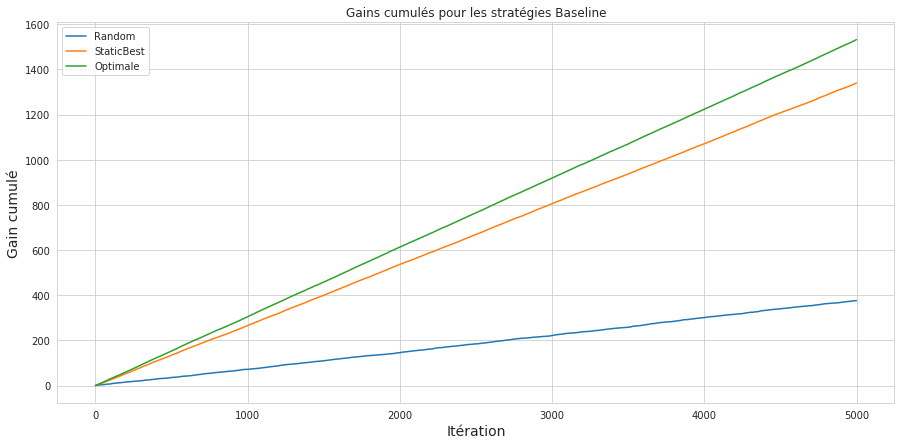

In [13]:
# Visualisation du gain cumulé pour chaque stratégie
fig = plt.figure(1, figsize=(15, 7))
plt.plot(gain_random_cum)
plt.plot(gain_staticbest_cum)
plt.plot(gain_optimal_cum)
plt.legend(['Random','StaticBest','Optimale']);
plt.xlabel('Itération', fontsize=14)
plt.ylabel('Gain cumulé', fontsize=14)
plt.title('Gains cumulés pour les stratégies Baseline')
plt.savefig('Bandit_R_S_O_Gains.svg')
plt.show()

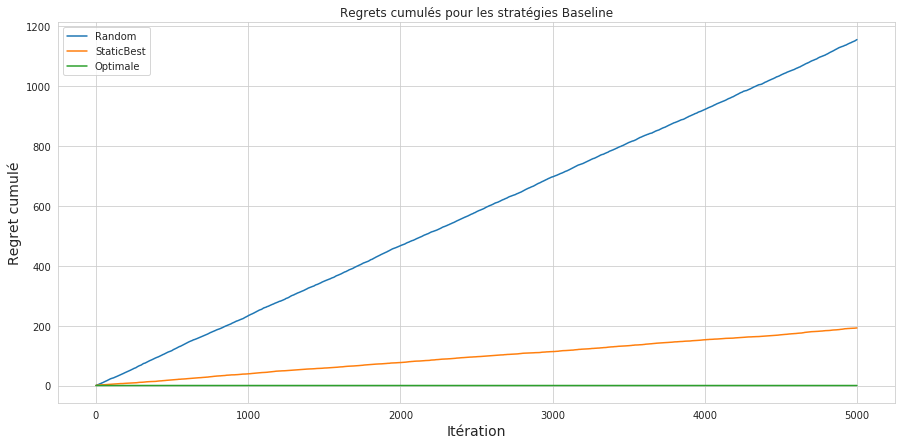

In [14]:
# Visualisation du regret cumulé pour chaque stratégie
fig = plt.figure(1, figsize=(15, 7))
plt.plot(regret_random_cum)
plt.plot(regret_staticbest_cum)
plt.plot(regret_optimal_cum)
plt.legend(['Random','StaticBest','Optimale']);
plt.xlabel('Itération', fontsize=14)
plt.ylabel('Regret cumulé', fontsize=14)
plt.title('Regrets cumulés pour les stratégies Baseline')
plt.savefig('Bandit_R_S_O_Regrets.svg')
plt.show()

### Commentaires : 
> * Comme prévu, la stratégie optimale est imbattable, mais dans le monde réel, elle n'est pas calculable.
> * La stratégie staticBest donne de bons résultats, mais elle n'est pas calculable non plus.
> * Nous utilisons les deux résultats afin de faire évoluer les stratégies que nous mettrons en œuvre par la suite et qui sont calculables dans le monde réel.

## Algorithme UCB

In [15]:
# La classe abstraite permet de définir le squelette de toutes stratégie
class Bandit:
    def __init__(self):
        pass
    def step(self,context,reward):           
    # permet de jouer un coup, retourne l'index du annonceur choisit
        action = self.action(context)
        self.update(reward,action)
        return action
    def action(self,context):
        pass
    def update(self,reward,action):
        pass

# La classe abstraite permet de définir le squelette des stratégies qui comptent les annonceurs choisient dans le passé pour choisir l'annonceur
class CountBased(Bandit):
    def __init__(self):
        pass
    def update(self,reward,action):
         # permet de jouer un coup (trouver l'action selon la stratégie et mettre à jour les parametres), retourne l'index du annonceur choisit
        self.mu[action]=(self.mu[action]*self.nb[action]+reward[action])/(self.nb[action]+1) # mu = ((mu*s) + gain)/(s+1) avec mu l'ancien moyenne et s le nombre de fois qu'on a utilisé cet annonceur
        self.nb[action]+=1

Upper-Confidence Bound :   $$\pi_t = argmax_i (B_{t,T_i(t-1)}(i))$$  <br> Avec $B_{t,s}(i)=\hat{\mu}_{i,s} + \sqrt{\frac{2*log(t)}{s}} $


In [16]:
# la classe permet de jouer en suivant la stratégie UCB à chaque fois
class UCB(CountBased):
    def __init__(self,data):
        #initialisation avec les 10 premiers tuples (context,reward) pour chaque tuple i on utilise l'annonceur i 
        self.mu = np.stack(np.array(list(data))[:10,1]).diagonal()
        # le nombre de fois ou on a utilisé les annonceurs
        self.nb=np.ones((list(data)[0][1].shape[0]))
        self.mu.flags.writeable = True
    def action(self,context):
        # permet de choisir la bonne action selon la stratégie 
        return np.argmax(self.mu+np.power(2*np.log(np.sum(self.nb))/self.nb,1/2))
    


       

In [17]:
# test de la classe
ucb = UCB(data)
for context,reward in data:
    print("'mu' before changing: ",str(ucb.mu))
    print("'S' before changing:",ucb.nb)
    print("action :",ucb.step(context,reward))
    print("'mu' after changing:",ucb.mu)
    print("'S' after changing:",ucb.nb)
    break




'mu' before changing:  [0.10341906 0.         0.         0.12723939 0.0498612  0.
 0.1854776  0.         0.         0.20138583]
'S' before changing: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
action : 9
'mu' after changing: [0.10341906 0.         0.         0.12723939 0.0498612  0.
 0.1854776  0.         0.         0.13997978]
'S' after changing: [1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]


## Algorithme e-Greedy

In [43]:
# la classe permet de jouer en suivant la stratégie UCB à chaque fois
class E_Greedy(CountBased):
    def __init__(self,data,e=0.1):
        #initialisation avec les 10 premiers tuples (context,reward) pour chaque tuple i on utilise l'annonceur i 
        self.mu = np.stack(np.array(list(data))[:10,1]).diagonal()
         # le nombre de fois ou on a utilisé les annonceurs
        self.nb=np.ones((list(data)[0][1].shape[0]))
        # learning rate
        self.e=e
        self.mu.flags.writeable = True
    def action(self,context):
         # permet de choisir la bonne action selon la stratégie 
        a = random()
        if(a<self.e):
            return np.random.randint(low = 0, high = len(context))
        return np.argmax(self.mu)
    

In [44]:
# test de la classe
e_greedy = E_Greedy(data,0.1)
for context,reward in data:
    print("'mu' before changing: ",e_greedy.mu)
    print("'S' before changing:",e_greedy.nb)
    print("action :",e_greedy.step(context,reward))
    print("'mu' after changing:",e_greedy.mu)
    print("'S' after changing:",e_greedy.nb)
    break


'mu' before changing:  [0.10341906 0.         0.         0.12723939 0.0498612  0.
 0.1854776  0.         0.         0.20138583]
'S' before changing: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
action : 9
'mu' after changing: [0.10341906 0.         0.         0.12723939 0.0498612  0.
 0.1854776  0.         0.         0.13997978]
'S' after changing: [1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]


## Algorithme LinUCB

In [45]:
# la classe permet de jouer en suivant la stratégie UCB à chaque fois
class LinUCB(Bandit):
    
    def __init__(self,data,alpha=0.2):
        # le nombre d'annonceurs
        self.nb=list(data)[0][1].shape[0]
        # coeff d'éxploration
        self.alpha=alpha
        # la dimention de context
        self.d =list(data)[0][0].shape[0]
        self.A=[np.identity(self.d)]*self.nb
        self.b=np.zeros((self.nb,self.d))

    def step(self,context,reward):
        # permet de jouer un coup (trouver l'action selon la stratégie et mettre à jour les parametres), retourne l'index du annonceur choisit
        context=context.reshape((self.d,1))
        action = self.action(context)
        self.update(action,reward,context)
        return action
    
    def action(self,context):
        # permet de choisir la bonne action selon la stratégie 
        val=np.zeros(self.nb)
        for i in range(self.nb):
            teta=np.dot(np.linalg.inv(self.A[i]),self.b[i]).reshape((self.d,1))
            p=np.dot(teta.T,context)+self.alpha*np.sqrt(np.dot(np.dot(context.T,np.linalg.inv(self.A[i])),context))    
            val[i]=p 
        return np.random.choice(np.where(val == val.max())[0])
    
    def update(self, action,reward,context):
        self.A[action]+=np.dot(context,context.T)
        self.b[action]+=reward[action]*context[:,0]
        

# Visualisations & Expériences 

## Optimisation de Alpha <br> 
Nous essayons d'optimiser l'alpha pour avoir le gain le plus élevé possible. Pour ce faire, nous effectuons des simulations avec plusieurs valeurs de alpha et traçons à chaque fois les courbes de gain cumulé.

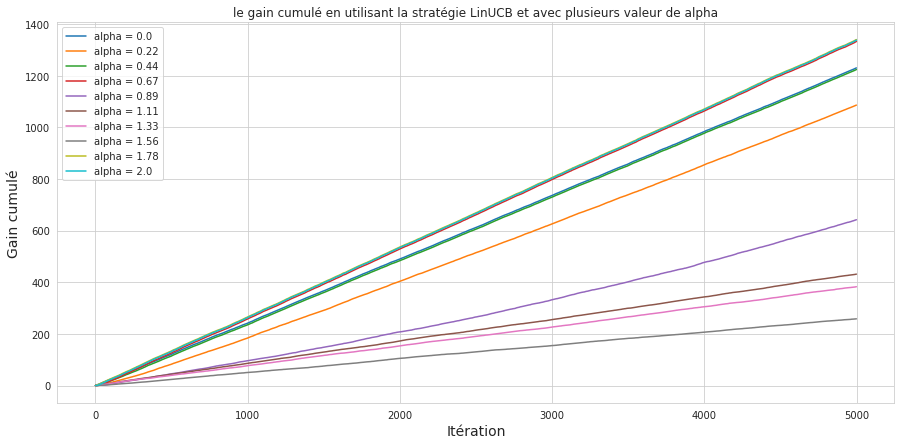

In [46]:
# Prenons plusieurs valeurs de alpha
Alphas = np.linspace(0, 2, num=10)
legends=[]
fig = plt.figure(1, figsize=(15, 7))
# pour chaque valeur de alpha
for i in range(len(Alphas)):
    gain_linUcb=[]
    linUcb = LinUCB(data,alpha=Alphas[i])
    for (context,reward) in data:
        gain_linUcb.append(reward[linUcb.step(context,reward)])
    plt.plot(np.array(gain_linUcb).cumsum(),label='LinUCB alpha = {}'.format(Alphas[i]))
    legends.append("alpha = "+str(round(Alphas[i],2)))
plt.xlabel('Itération', fontsize=14)
plt.ylabel('Gain cumulé', fontsize=14)
plt.title('le gain cumulé en utilisant la stratégie LinUCB et avec plusieurs valeur de alpha')
plt.legend(legends);
plt.savefig('Bandit_LinUCB_alphas.svg')

plt.show()
    
   

## Comparaison <br>
Nous comparons les différentes stratégies au moyen de simulations et calculons le gain et le regret cumulés pour chaque stratégie

In [47]:
regret_linUcb=[]
regret_ucb=[]
regret_e_greedy=[]

gain_linUcb=[]
gain_ucb=[]
gain_e_greedy=[]
linUcb = LinUCB(data)
ucb = UCB(data)
e_greedy = E_Greedy(data,0.5)
for (context,reward) in data:
     # calcule des actions choisient par chaque stratégie
    action_linUcb = linUcb.step(context,reward)
    action_ucb = ucb.step(context,reward)
    action_e_greedy = e_greedy.step(context,reward) 
    
    gain_linUcb.append(reward[action_linUcb])
    gain_ucb.append(reward[action_ucb])
    gain_e_greedy.append(reward[action_e_greedy])
    
    m = max(reward)
    regret_linUcb.append(m-reward[action_linUcb])
    regret_ucb.append(m-reward[action_ucb])
    regret_e_greedy.append(m-reward[action_e_greedy])
    
gain_linUcb_cum = np.array(gain_linUcb).cumsum()
gain_ucb_cum = np.array(gain_ucb).cumsum()
gain_e_greedy_cum = np.array(gain_e_greedy).cumsum()

regret_linUcb_cum = np.array(regret_linUcb).cumsum()
regret_ucb_cum = np.array(regret_ucb).cumsum()
regret_e_greedy_cum = np.array(regret_e_greedy).cumsum()

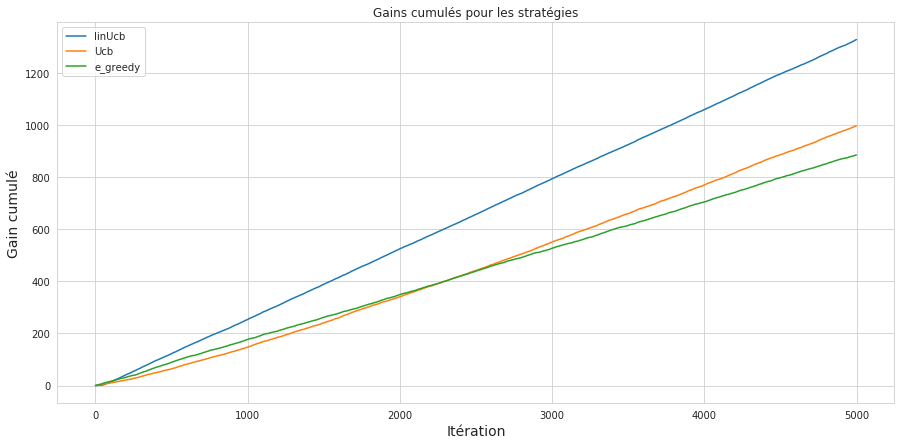

In [35]:
# visualisation de gain cumulé pour chaque stratégie
plt.figure(1, figsize=(15, 7))
plt.plot(gain_linUcb_cum)
plt.plot(gain_ucb_cum)
plt.plot(gain_e_greedy_cum)
plt.legend(['linUcb','Ucb','e_greedy'])
plt.xlabel('Itération', fontsize=14)
plt.ylabel('Gain cumulé', fontsize=14)
plt.title('Gains cumulés pour les stratégies')
plt.show()

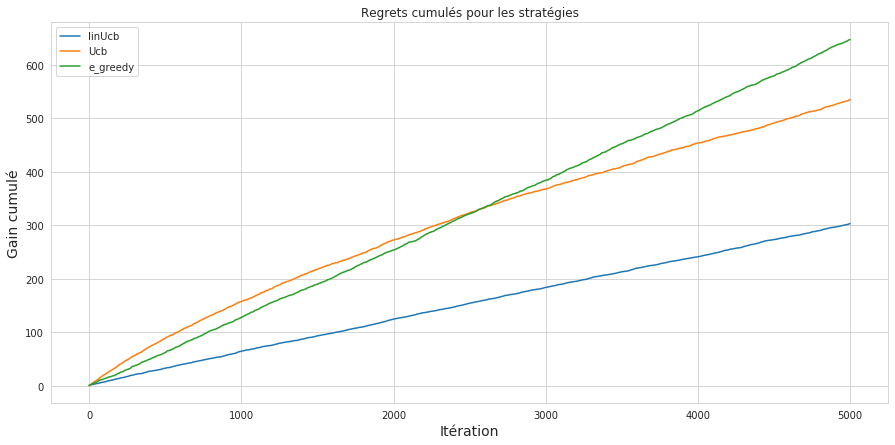

In [48]:
# visualisation du regret cumulé pour chaque stratégie
plt.figure(1, figsize=(15, 7))
plt.plot(regret_linUcb_cum)
plt.plot(regret_ucb_cum)
plt.plot(regret_e_greedy_cum)
plt.legend(['linUcb','Ucb','e_greedy'])
plt.xlabel('Itération', fontsize=14)
plt.ylabel('Gain cumulé', fontsize=14)
plt.title('Regrets cumulés pour les stratégies')
plt.savefig('Bandit_Regrets_tous.svg')

plt.show()

### Maintenant, afin d'évaluer nos stratégies, nous les comparons avec les stratégies de base et traçons les courbes de rentabilité. 

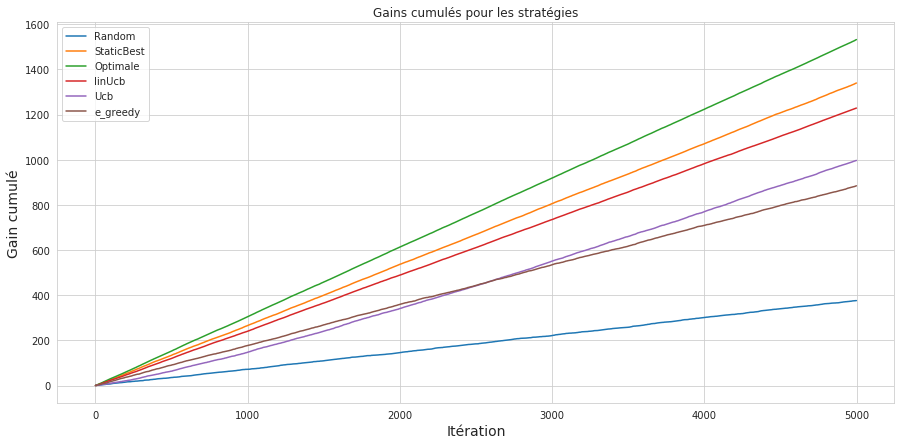

In [49]:
plt.figure(1, figsize=(15, 7))
plt.plot(gain_random_cum)
plt.plot(gain_staticbest_cum)
plt.plot(gain_optimal_cum)
plt.plot(gain_linUcb_cum)
plt.plot(gain_ucb_cum)
plt.plot(gain_e_greedy_cum)
plt.legend(['Random','StaticBest','Optimale','linUcb','Ucb','e_greedy'])
plt.xlabel('Itération', fontsize=14)
plt.ylabel('Gain cumulé', fontsize=14)
plt.title('Gains cumulés pour les stratégies')
plt.savefig('Bandit_Gains_tous.svg')
plt.show()